In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
!pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3421241 sha256=9d18bf5f47adf54747a9ade5a558e1c5517bdac57e88bc4df2614dcc6c6ef47a
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102543 sha256=f446255f497b36e8606c524b564e68a96f2707935b30a3476123281b146e6f5c
  Stored in directory: /root/.cache/pip/wheels/d2/ef/9c/da9ceef7d0ff5287c24365844fc394852c2b79ac3fcf33bf8b
Successfully built GPy paramz


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import GPy

In [6]:
np.random.seed(42)
time = np.sort(np.random.uniform(0, 10, 100))
temperature = 2 * np.sin(time) + 0.5 * time + np.random.normal(0, 0.2, size=len(time))

In [7]:
missing_idx = np.random.choice(len(time), size=20, replace=False)
temperature[missing_idx] = np.nan

In [8]:
time_scaled = StandardScaler().fit_transform(time.reshape(-1, 1))

In [9]:
kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(time_scaled, temperature.reshape(-1, 1), kernel)
model.optimize()

In [10]:
time_pred = np.linspace(min(time_scaled), max(time_scaled), 100).reshape(-1, 1)
prediction, variance = model.predict(time_pred)

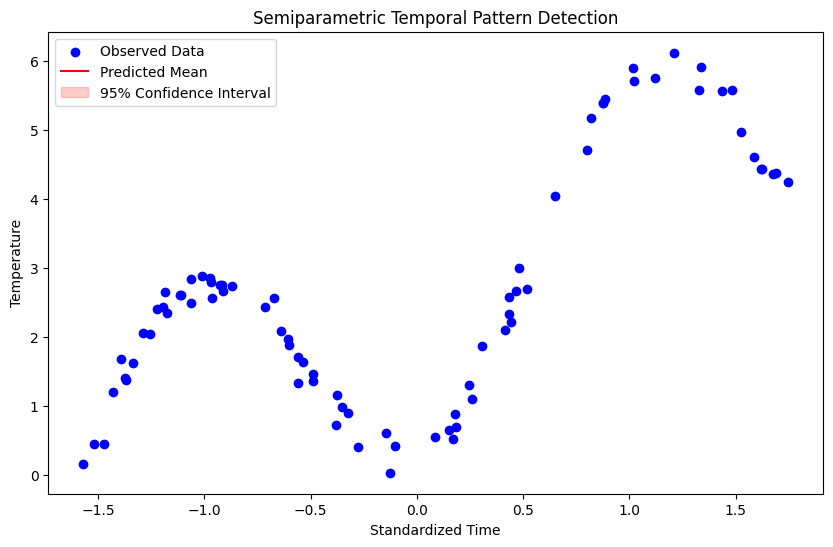

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(time_scaled, temperature, label='Observed Data', color='blue')
plt.plot(time_pred, prediction, label='Predicted Mean', color='red')
plt.fill_between(
    time_pred.flatten(),
    (prediction - 1.96 * np.sqrt(variance)).flatten(),
    (prediction + 1.96 * np.sqrt(variance)).flatten(),
    color='red',
    alpha=0.2,
    label='95% Confidence Interval'
)
plt.title('Semiparametric Temporal Pattern Detection')
plt.xlabel('Standardized Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()